In [5]:
import os
from sklearn.model_selection import train_test_split
from helper import * 
from unet import UNet
import torch
from torch import optim

TRAIN_RATIO = 0.8
RS = 30448
N_CHANNELS, N_CLASSES = 1, 1 
bilinear = True
BATCH_SIZE, EPOCHS = 16, 500
IMAGE_SIZE = (600, 600)
CROP_SIZE = (600, 600)
device = torch.device('cuda:0')
LR, WD, TH = 1e-3, 1e-4, 0.9
best_avg_acc, best_epoch = 0.0, 0
CLIENTS = ['miccai', 'bns', 'monu']
CLIENTS_2 = [cl + '_2' for cl in CLIENTS]
###################################################################
TOTAL_CLIENTS = len(CLIENTS)

DIR_DATA = 'data/imagesTrAug/'
DIR_GT = 'data/labelsTrBW/'

# Costruire una lista dei nomi dei file per ciascun nuovo dataset.
skin_dataset = dict()
skin_dataset['miccai'] = ['miccai_{:03d}'.format(i) for i in range(201, 227)]  # Nomi dei file per il dataset "miccai"
skin_dataset['bns'] = ['bns_{:03d}'.format(i) for i in range(181, 204)]  # Nomi dei file per il dataset "bns"
skin_dataset['monu'] = ['monu_{:03d}'.format(i) for i in range(1, 52)]  # Nomi dei file per il dataset "monu"
split_dataset = dict()
STATIC_WEIGHT = [0, 0, 0]
order = 0

for client in skin_dataset:
    tmp = skin_dataset[client]
    x_ = [os.path.join(DIR_DATA, f + '.png') for f in tmp]
    y_ = [os.path.join(DIR_GT, f + '.png') for f in tmp]
    
    x_train, x_test, y_train, y_test = train_test_split(
        x_, y_, test_size=1 - TRAIN_RATIO, random_state=RS)

    split_dataset[client + '_train'] = Cancer(x_train, y_train, train=True, \
                                              IMAGE_SIZE=IMAGE_SIZE \
                                              , CROP_SIZE=CROP_SIZE)
    STATIC_WEIGHT[order] = len(x_train)
    order += 1

    split_dataset[client + '_test'] = Cancer(x_test, y_test, train=False, \
                                             IMAGE_SIZE=IMAGE_SIZE \
                                             , CROP_SIZE=CROP_SIZE)
    print(client)


# Aggiungi le immagini rimanenti di Miccai al set di addestramento di Miccai
miccai_remaining = ['miccai_{:03d}'.format(i) for i in range(1, 201)]  # Immagini non ancora aggiunte
miccai_train = split_dataset['miccai_train'].data  # Percorsi delle immagini già nel set di addestramento di Miccai
miccai_remaining = [os.path.join(DIR_DATA, f + '.png') for f in miccai_remaining if f not in miccai_train]
split_dataset['miccai_train'].data.extend(miccai_remaining)

# Aggiungi le immagini rimanenti di Bns al set di addestramento di Bns
bns_remaining = ['bns_{:03d}'.format(i) for i in range(1, 181)]  # Immagini non ancora aggiunte
bns_train = split_dataset['bns_train'].data  # Percorsi delle immagini già nel set di addestramento di Bns
bns_remaining = [os.path.join(DIR_DATA, f + '.png') for f in bns_remaining if f not in bns_train]
split_dataset['bns_train'].data.extend(bns_remaining)

# Aggiungi le immagini rimanenti di Bns al set di addestramento di MoNu
monu_remaining = ['monu_{:03d}'.format(i) for i in range(52, 155)]  # Immagini non ancora aggiunte
monu_train = split_dataset['monu_train'].data  # Percorsi delle immagini già nel set di addestramento di MoNu
monu_remaining = [os.path.join(DIR_DATA, f + '.png') for f in monu_remaining if f not in monu_train]
split_dataset['monu_train'].data.extend(monu_remaining)

training_clients, testing_clients = dict(), dict()
training_clients_pl = dict()

acc_train, acc_test, loss_train, loss_test = dict(), dict(), \
                                            dict(), dict()
    
nets, optimizers = dict(), dict()

nets['global'] = UNet(n_channels=N_CHANNELS, n_classes=N_CLASSES, \
                      bilinear=True).to(device)

nets['global_2'] = UNet(n_channels=N_CHANNELS, n_classes=N_CLASSES, \
                      bilinear=True).to(device)

for client in CLIENTS:
    print(client)
    training_clients[client] = DataLoader(split_dataset[client+'_train'], batch_size=4,\
                 shuffle=True, num_workers=8)
    training_clients_pl[client] = DataLoader(split_dataset[client+'_train'], batch_size=1, \
                shuffle=True, num_workers=8)
    ###################################################################################
    testing_clients[client] = DataLoader(split_dataset[client+'_test'], batch_size=1,\
                         shuffle=False, num_workers=1)
    
    acc_train[client], acc_test[client] = [], []
    loss_train[client], loss_test[client] = [], []
        
    nets[client] = UNet(n_channels=N_CHANNELS, n_classes=N_CLASSES, \
                      bilinear=True).to(device)
    nets[client+'_2'] = UNet(n_channels=N_CHANNELS, n_classes=N_CLASSES, \
                      bilinear=True).to(device)
    optimizers[client]= optim.Adam(nets[client].parameters(), \
                                   lr=LR,weight_decay=WD)
    optimizers[client+'_2']= optim.Adam(nets[client+'_2'].parameters(), \
                                   lr=LR,weight_decay=WD)

miccai
bns
monu
miccai
bns
monu


In [1]:
# Usa per testare col dataset MoNu
import os
from sklearn.model_selection import train_test_split
from helper import * 
from unet import UNet
import torch
from torch import optim

TRAIN_RATIO = 0.8
RS = 30448
N_CHANNELS, N_CLASSES = 1, 1 
bilinear = True
BATCH_SIZE, EPOCHS = 16, 500
IMAGE_SIZE = (1000, 1000)
CROP_SIZE = (1000, 1000)
device = torch.device('cuda:0')
LR, WD, TH = 1e-3, 1e-4, 0.9
best_avg_acc, best_epoch = 0.0, 0
CLIENTS = ['monu']
CLIENTS_2 = [cl + '_2' for cl in CLIENTS]
###################################################################
TOTAL_CLIENTS = len(CLIENTS)
training_clients, testing_clients = dict(), dict()
training_clients_pl = dict()

acc_train, acc_test, loss_train, loss_test = dict(), dict(), \
                                            dict(), dict()
    
nets, optimizers = dict(), dict()
DIR_DATA = r'C:\Users\utente\Desktop\Università\Tesi magistrale\FedMix\data\MoNuSegTestData'
DIR_GT = r'C:\Users\utente\Desktop\Università\Tesi magistrale\FedMix\data\MoNuSegLabelPNGTestData'

# Costruire una lista dei nomi dei file per ciascun nuovo dataset.
skin_dataset = dict()
skin_dataset['monu'] = [f for f in os.listdir("C:/Users/utente/Desktop/Università/Tesi magistrale/FedMix/data/MoNuSegTestData") if f.startswith("TCGA")]  
skin_dataset['monulbl'] = [f for f in os.listdir("C:/Users/utente/Desktop/Università/Tesi magistrale/FedMix/data/MoNuSegLabelPNGTestData") if f.startswith("TCGA")]  
split_dataset = dict()
STATIC_WEIGHT = [0, 0]
order = 0

x_ = [os.path.join(DIR_DATA, f) for f in skin_dataset['monu']]
y_ = [os.path.join(DIR_GT, f) for f in skin_dataset['monulbl']]

STATIC_WEIGHT[order] = len(x_)
order += 1

split_dataset['monu_test'] = Cancer(x_, y_, train=False, \
                                             IMAGE_SIZE=IMAGE_SIZE \
                                             , CROP_SIZE=CROP_SIZE)

testing_clients['monu'] = DataLoader(split_dataset['monu_test'], batch_size=1,\
                         shuffle=False, num_workers=1)

acc_train, acc_test, loss_train, loss_test = dict(), dict(), \
                                            dict(), dict()
    
nets, optimizers = dict(), dict()

nets['global'] = UNet(n_channels=N_CHANNELS, n_classes=N_CLASSES, \
                      bilinear=True).to(device)

nets['global_2'] = UNet(n_channels=N_CHANNELS, n_classes=N_CLASSES, \
                      bilinear=True).to(device)

In [6]:
import numpy as np

def precision_score_(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    total_pixel_pred = np.sum(pred_mask)
    precision = np.mean(intersect/total_pixel_pred)
    return round(precision, 3)

def recall_score_(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    total_pixel_truth = np.sum(groundtruth_mask)
    recall = np.mean(intersect/total_pixel_truth)
    return round(recall, 3)

def accuracy(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    union = np.sum(pred_mask) + np.sum(groundtruth_mask) - intersect
    xor = np.sum(groundtruth_mask==pred_mask)
    acc = np.mean(xor/(union + xor - intersect))
    return round(acc, 3)

def dice_coef(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    total_sum = np.sum(pred_mask) + np.sum(groundtruth_mask)
    dice = np.mean(2*intersect/total_sum)
    return round(dice, 3) #round up to 3 decimal places

def iou(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    union = np.sum(pred_mask) + np.sum(groundtruth_mask) - intersect
    iou = np.mean(intersect/union)
    return round(iou, 3)

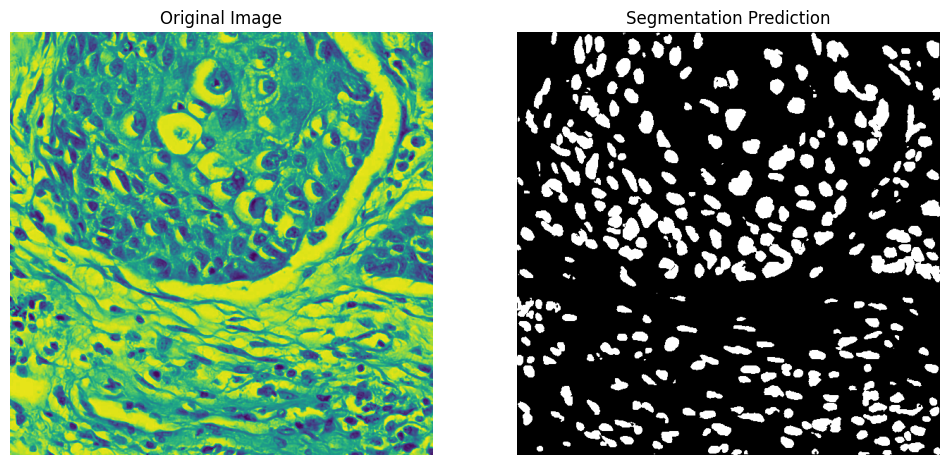

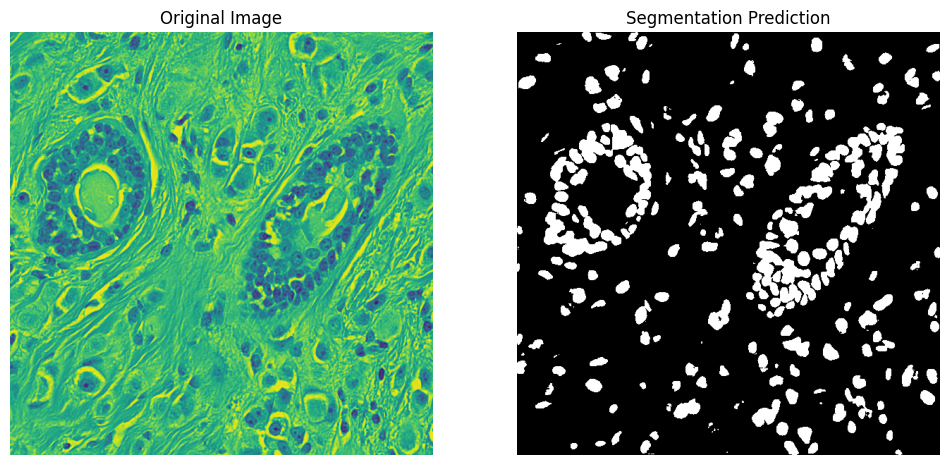

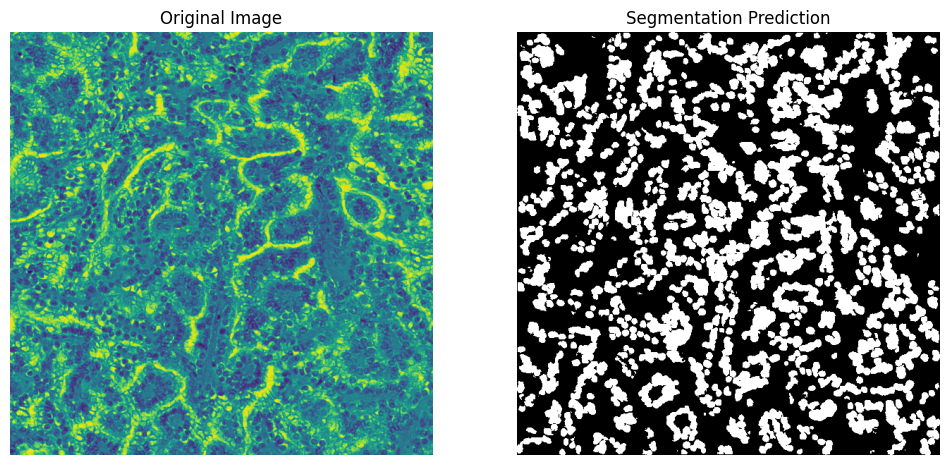

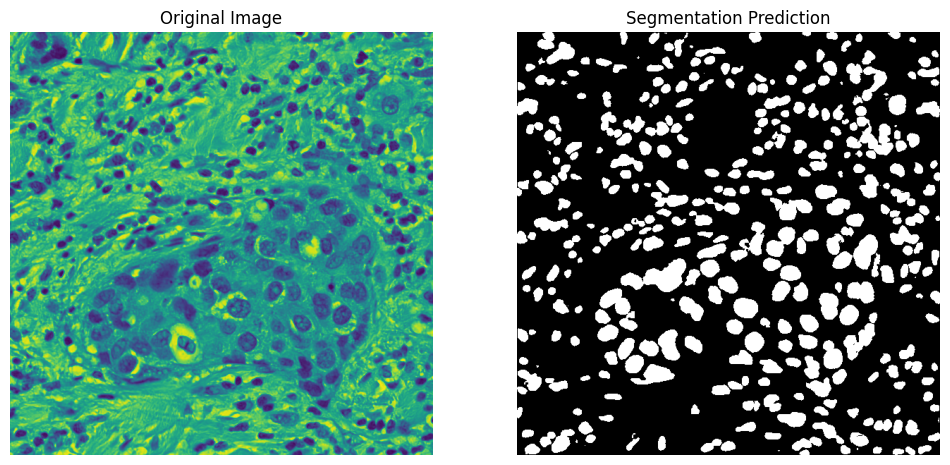

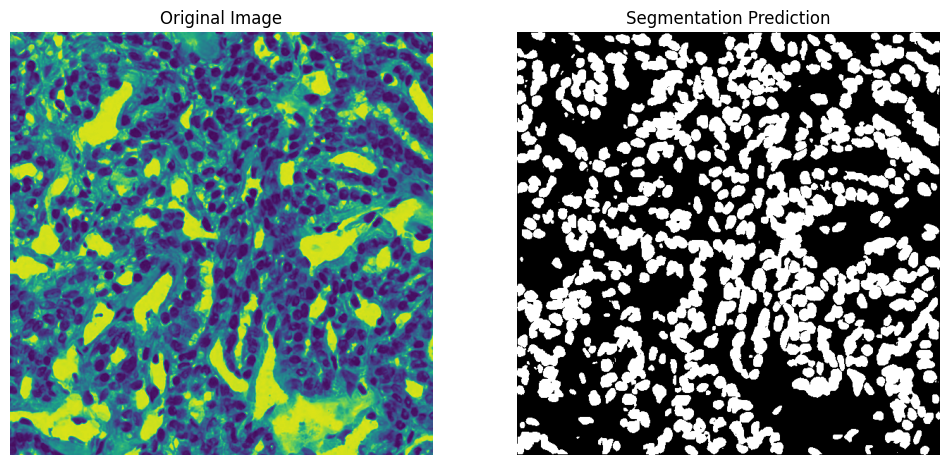

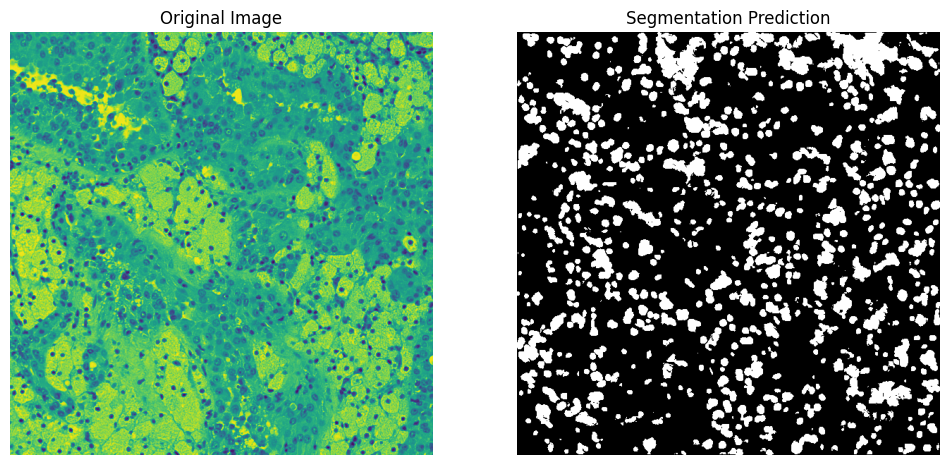

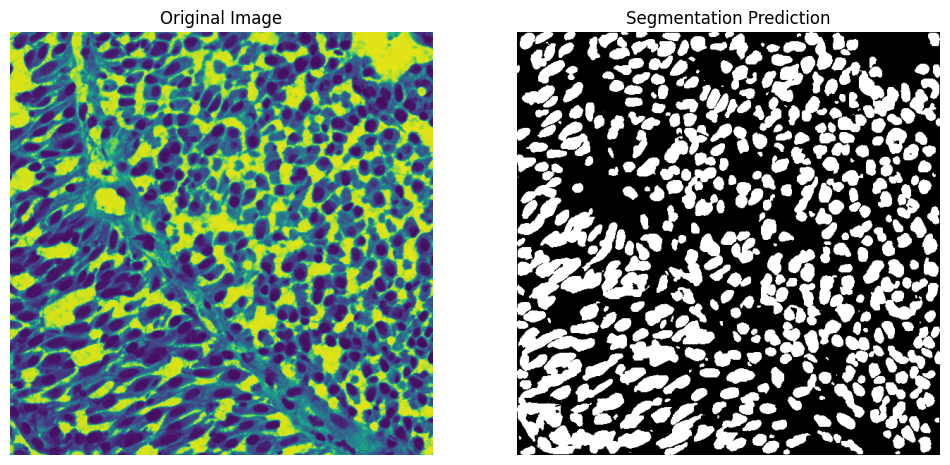

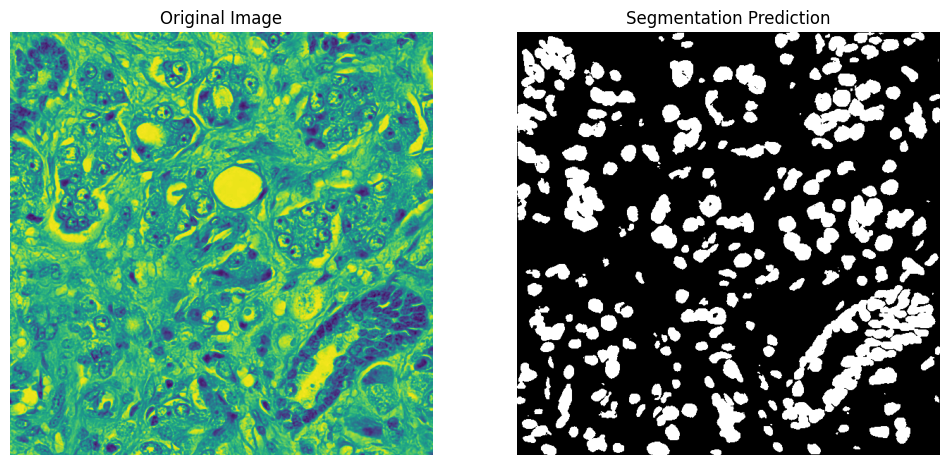

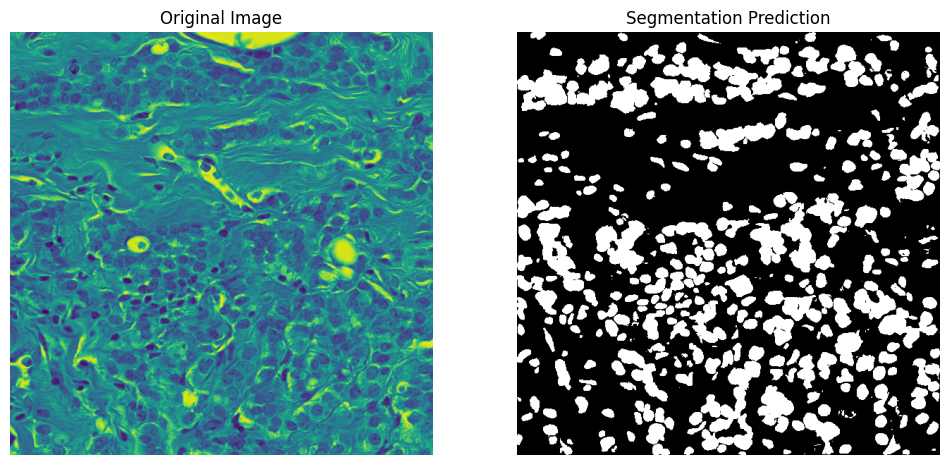

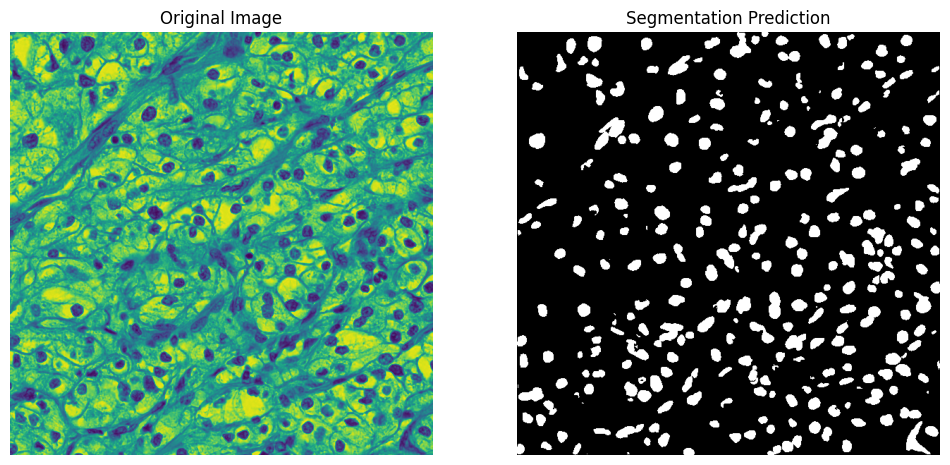

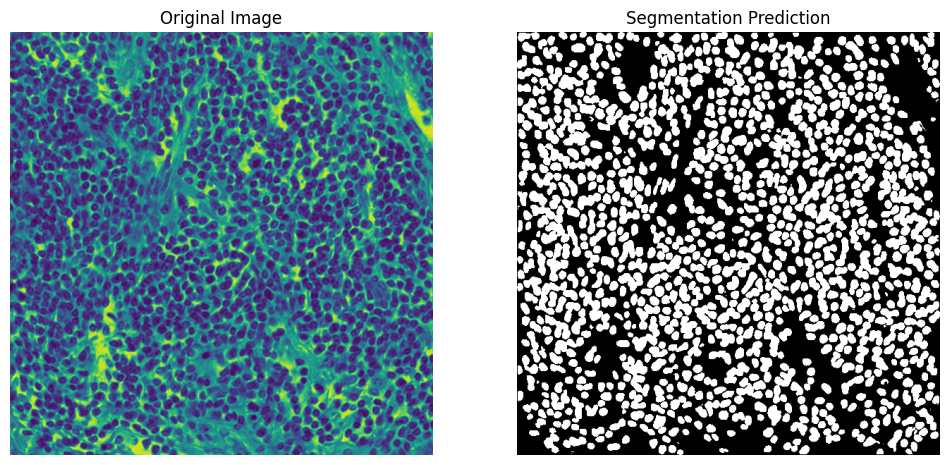

Test Loss: 0.323
Precision: 0.593
Recall: 0.812
Accuracy: 0.827
Dice Coef: 0.677
Jaccard Index: 0.538


In [13]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

def test_ultimate(epoch, testloader, net, device, acc=None, loss=None):
    net.eval()
    t_loss, t_acc = 0, 0
    t_precision, t_recall, t_accuracy, t_dice, t_iou = 0, 0, 0, 0, 0
    num_samples = len(testloader.dataset)
    
    with torch.no_grad():
        for (imgs, masks, _) in testloader:
            masks = masks.type(torch.float32)
            imgs, masks = imgs.to(device), masks.to(device)
            
            masks_pred = net(imgs)
            masks_pred = torch.sigmoid(masks_pred)
            l_ = 1 - dice_coeff(masks_pred, masks.type(torch.float))
            t_loss += l_.item()
            
            masks_pred = (masks_pred > 0.5).float()
            
           
            for i in range(imgs.size(0)):
                pred_mask = masks_pred[i].squeeze().cpu().numpy()
                gt_mask = masks[i].squeeze().cpu().numpy()
                t_precision += precision_score_(gt_mask, pred_mask)
                t_recall += recall_score_(gt_mask, pred_mask)
                t_accuracy += accuracy(gt_mask, pred_mask)
                t_dice += dice_coef(gt_mask, pred_mask)
                t_iou += iou(gt_mask, pred_mask)
            
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(imgs.squeeze(0).permute(1, 2, 0).cpu().numpy())
            plt.title('Original Image')
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(masks_pred.squeeze(0).squeeze(0).cpu().numpy(), cmap='gray')
            plt.title('Segmentation Prediction')
            plt.axis('off')
            plt.show()

 
    t_loss /= len(testloader)
    t_precision /= num_samples
    t_recall /= num_samples
    t_accuracy /= num_samples
    t_dice /= num_samples
    t_iou /= num_samples
    

    print(f"Test Loss: {round(t_loss, 3)}")
    print(f"Precision: {round(t_precision, 3)}")
    print(f"Recall: {round(t_recall, 3)}")
    print(f"Accuracy: {round(t_accuracy, 3)}")
    print(f"Dice Coef: {round(t_dice, 3)}")
    print(f"Jaccard Index: {round(t_iou, 3)}")
    
    if acc is not None:
        acc.append(t_accuracy)
    if loss is not None:
        loss.append(t_loss)
   
    del t_acc, t_loss

model_path = r"C:\Users\utente\Desktop\best_fed_model.pt"
testing_loader = testing_clients['monu']
net = nets['global']

net.load_state_dict(torch.load(model_path))

test_ultimate(323, testing_loader, net, device)